<div style="background-color:#F8D7DA; color:#721C24; padding:20px; border-radius:10px; text-align:center;">
    <h3 style="font-weight:bold; margin-top:0; font: 30px Arial;">🔴 Bar Graph</h3>
</div>
<br>
<div style="background-color:green; color:white; padding:20px; border-radius:10px; text-align:center;">
<p style="font: 18px Arial, sans-serif;">🔴 A Bar Graph is a visual representation of data where rectangular bars of varying lengths are used to convey the quantitative values of different categories. The length of each bar corresponds to the magnitude of the data it represents, making it easy to compare values across categories.</p>

</div>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import csv
from collections import Counter


In [96]:
data=pd.read_csv("laptop_pricing_dataset.csv",index_col=0)
data.head()

,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


# Data preprocessing

In [97]:
data.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64


# There is are some missing values 
# 3 ways
# 1-> fill the missing value with the mean 
# 2-> fill the missing value with the specific or a constant number like 0
# 3-> remove the row or column with the missing value ( for int dtype)

In [98]:
# filling the mean in the null values
data['Screen_Size_cm'].fillna(data['Screen_Size_cm'].mean())
data['Weight_kg'].fillna(data['Weight_kg'].mean())


0      1.60
1      2.20
2      2.20
3      1.22
4      1.91
       ... 
233    1.70
234    1.20
235    1.36
236    2.40
237    1.95
Name: Weight_kg, Length: 238, dtype: float64

In [99]:
# remove the missing value row
data.dropna(subset=['Screen_Size_cm', 'Weight_kg'])


,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
...,...,...,...,...,...,...,...,...,...,...,...,...
233,Lenovo,4,IPS Panel,2,1,7,35.560,2.6,8,256,1.70,1891
234,Toshiba,3,Full HD,2,1,5,33.782,2.4,8,256,1.20,1950
235,Lenovo,4,IPS Panel,2,1,5,30.480,2.6,8,256,1.36,2236
236,Lenovo,3,Full HD,3,1,5,39.624,2.5,6,256,2.40,883


In [100]:
# filling the const number
data['Screen_Size_cm'].fillna(0, inplace=True)  # Replace NaN with 0
data['Weight_kg'].fillna(0, inplace=True)       # Replace NaN with 0


In [101]:
data.isnull().sum()

Manufacturer      0
Category          0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

In [102]:
# printing unique values
print(" Printing the unique value in the each column")
for col in data.select_dtypes(include="object"):
    print(f" -{col}-> {data[col].unique()}\n")

     

 Printing the unique value in the each column
 -Manufacturer-> ['Acer' 'Dell' 'HP' 'Asus' 'Lenovo' 'Huawei' 'Toshiba' 'MSI' 'Razer'
 'Samsung' 'Xiaomi']

 -Screen-> ['IPS Panel' 'Full HD']



In [103]:
new_data=data.groupby("Manufacturer").size().reset_index(name="no_of_laptop")
new_data

,Manufacturer,no_of_laptop
0,Acer,19
1,Asus,18
2,Dell,71
3,HP,49
4,Huawei,1
5,Lenovo,52
6,MSI,4
7,Razer,1
8,Samsung,5
9,Toshiba,17


In [104]:
laptops_manufacturer=new_data.Manufacturer
laptops_manufacturer
count=new_data.no_of_laptop
color = ['rosybrown']


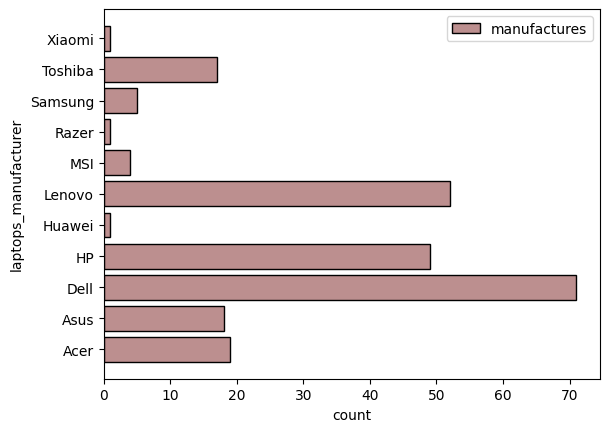

In [108]:
plt.barh(laptops_manufacturer,count,color=color,label="manufactures",edgecolor="black")
plt.xlabel("count")
plt.ylabel("laptops_manufacturer")
plt.legend()
